In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in the files we will use
APIlowincome = pd.read_csv("Data/InflationMerged_LowIncome.csv")
APIlowmidincome = pd.read_csv(
    "Data/InflationMerged_LowMidIncome.csv")
APIuppermidincome = pd.read_csv(
    "Data/InflationMerged_UpperMidIncome.csv")
APIhighincome = pd.read_csv("Data/InflationMerged_HighIncome.csv")
APIaggincome = pd.read_csv(
    "Data/InflationMerged_AggregateIncome.csv")
APIall = pd.read_csv("Data/InflationMerged_AllIncome.csv")


In [73]:
# Append the world average to the aggregate income table and remove unneeded columns
APIaggincome = APIaggincome.append(APIall[APIall['Country Name'] == 'World'])
APIaggincome.reset_index( inplace=True)
APIaggincome = APIaggincome.drop(
    ['index', 'Region', 'IncomeGroup', 'Country Code'], axis=1)

# remove the columns that have no values in themselves
APIaggincome.dropna(axis=1, how='all', inplace=True)
print(APIaggincome)
print(APIaggincome.info())

          Country Name       1977      1978       1979       1980       1981  \
0           Low income        NaN       NaN        NaN        NaN        NaN   
1  Lower middle income  11.472362  8.315099  10.925736  14.700981  12.452895   
2  Upper middle income        NaN       NaN        NaN        NaN        NaN   
3          High income        NaN       NaN        NaN  13.517561  11.509756   
4                World        NaN       NaN        NaN        NaN  12.471612   

        1982       1983       1984       1985  ...      2011      2012  \
0        NaN        NaN   9.543070  10.471408  ...  8.055495  7.174205   
1  10.667614  11.708363  11.015522   7.890640  ...  6.332795  5.196186   
2        NaN        NaN        NaN        NaN  ...  5.671576  3.781808   
3   9.121382   7.094062   6.081602   4.678751  ...  3.316857  2.585324   
4  10.240268   8.771147   8.116398   6.856812  ...  4.822396  3.725327   

       2013      2014      2015      2016      2017      2018      2019  \

In [74]:
APIaggmelt = APIaggincome.melt(id_vars=['Country Name'])
print(APIaggmelt)
print(APIaggmelt.info())
APIaggmelt['variable'] = pd.to_datetime(APIaggmelt['variable'], format='%Y')
#APIaggmelt['variable'] = str(APIaggmelt['variable'])



            Country Name variable      value
0             Low income     1977        NaN
1    Lower middle income     1977  11.472362
2    Upper middle income     1977        NaN
3            High income     1977        NaN
4                  World     1977        NaN
..                   ...      ...        ...
215           Low income     2020   6.626191
216  Lower middle income     2020   3.255612
217  Upper middle income     2020   2.049871
218          High income     2020   0.506690
219                World     2020   1.936941

[220 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  220 non-null    object 
 1   variable      220 non-null    object 
 2   value         197 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.3+ KB
None


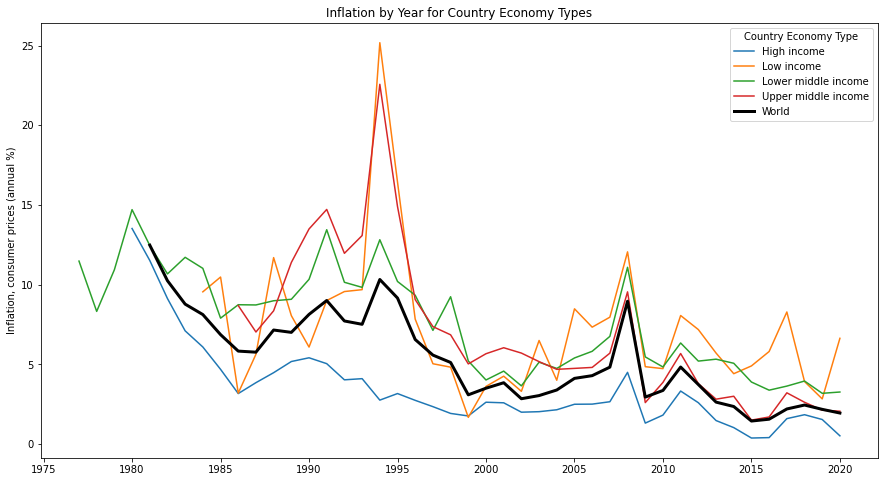

<Figure size 432x288 with 0 Axes>

In [114]:

#ax = APIaggincome[APIaggincome['Country Name']=='High income'].plot(kind='line')
''' ax = APIaggincome.iloc[0].plot(title="Comparing states by proportion of unequal gendered businesses",
                     kind='line', x='variable', y='value', color="Country Name")
ax.set_xlabel('Percentage of Businesses Predominantly Male')
ax.set_ylabel('Percentage of Businesses Predominantly Female')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50) '''
fig, ax = plt.subplots()
ax.plot(APIaggmelt[APIaggmelt['Country Name'] == 'High income']['variable'],
         APIaggmelt[APIaggmelt['Country Name'] == 'High income']['value'], 
        label='High income')
ax.plot(APIaggmelt[APIaggmelt['Country Name'] == 'Low income']['variable'],
        APIaggmelt[APIaggmelt['Country Name'] == 'Low income']['value'],
        label='Low income')
ax.plot(APIaggmelt[APIaggmelt['Country Name'] == 'Lower middle income']['variable'],
        APIaggmelt[APIaggmelt['Country Name']
                   == 'Lower middle income']['value'],
        label='Lower middle income')
ax.plot(APIaggmelt[APIaggmelt['Country Name'] == 'Upper middle income']['variable'],
        APIaggmelt[APIaggmelt['Country Name']
                   == 'Upper middle income']['value'],
        label='Upper middle income')
ax.plot(APIaggmelt[APIaggmelt['Country Name'] == 'World']['variable'],
        APIaggmelt[APIaggmelt['Country Name'] == 'World']['value'], linewidth=3, color='black',
        label='World')
ax.set_ylabel('Inflation, consumer prices (annual %)')
ax.set_title('Inflation by Year for Country Economy Types')
ax.legend(title='Country Economy Type')
f = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()


D:\Users\Darrell\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


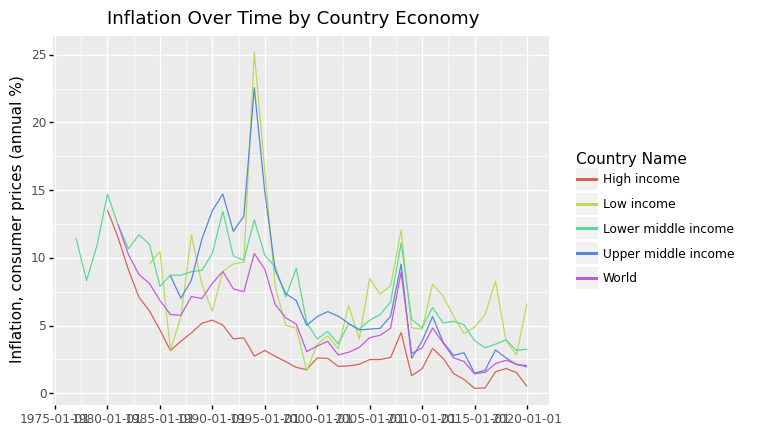

In [116]:
import pandas as pd
import datetime as dt
import plotnine as pn

breaks = [dt.datetime(1980, 1, 1), dt.datetime(1990, 1, 1), dt.datetime(2000, 1, 1), 
          dt.datetime(2010, 1, 1), dt.datetime(2020, 1, 1)]
labels = ['1980', '1990', '2000', '2010', '2020']
g = pn.ggplot(APIaggmelt) + \
    pn.aes(y="value", x="variable", fill="Country Name", color="Country Name", group="Country Name") + \
    pn.geom_line(stat='identity') + pn.xlab("") + pn.ylab("Inflation, consumer prices (annual %)") + \
    pn.ggtitle("Inflation Over Time by Country Economy") 
    
print(g) 
plt.show()
